In [1]:
# importing libraries 

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import load_model

import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# function to receive and load an image, predicting its fracture class and plotting a graph for it

model = load_model('best_model_-10.h5')
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

def xray_image(img_path, model):
    '''
    This function receives the location path of an image and a model. It loads and transforms the image in order to apply 
    a model on it in order to make predictions. Then it shows the image and its predictions graph side by side.
    Input: Image path (location) and model (optional)
    Output: The image and the graph of its predictions side by side
    '''
    img = image.load_img(img_path, target_size=(299, 299))  
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    predictions = model.predict(img_array)

    labels = ['Elbow fracture', 'Fingers fracture', 'Forearm fracture', 'Wrist fracture', 'Humerus Fracture', 'Shoulder fracture']
    image_to_plot = img

    fig, axes = plt.subplots(1, 2, figsize=(12, 8), gridspec_kw={'width_ratios': [2, 5]})
    axes[0].imshow(image_to_plot, cmap='gray')
    axes[0].set_title('X-ray')

    sns.barplot(x=labels, y=predictions[0], hue=labels, palette='Set2', ax=axes[1])
    axes[1].set_title('Predictions')
    axes[1].set_ylim([0, 1])  
    axes[1].set_ylabel('Probability')  
    axes[1].tick_params(axis='x', rotation=45, labelsize=8)

    return plt.show()

1/1 [==============================] - 1s 561ms/step


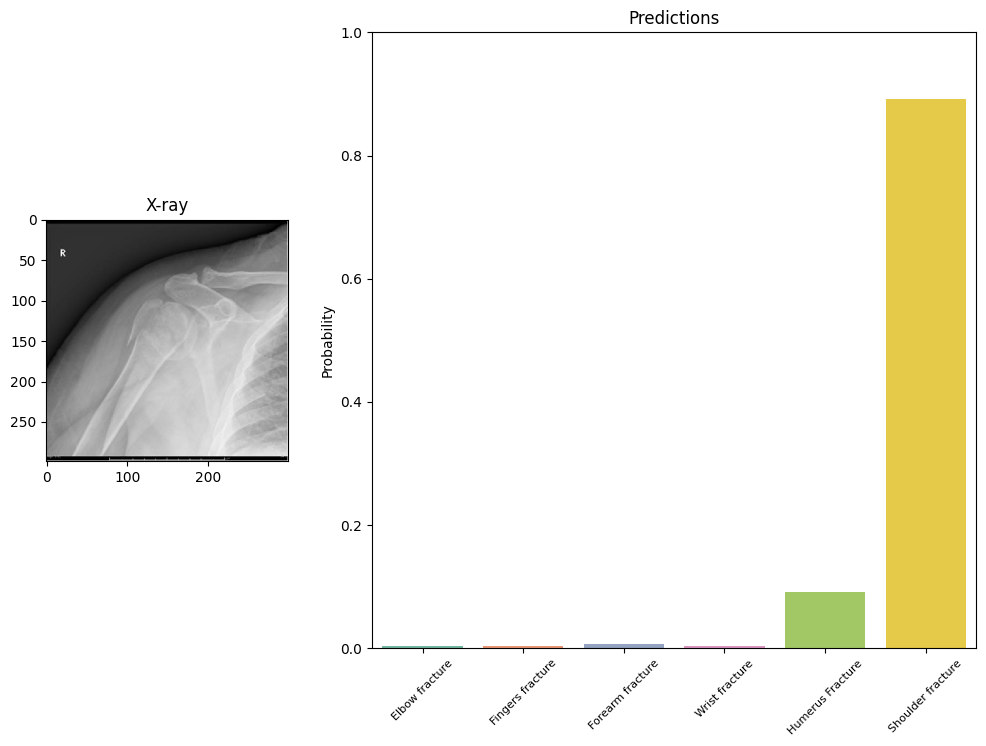

In [3]:
# trying the function with an example of random image from the internet 

xray_image('/Users/vschuckar/Desktop/data_analytics/Week_9/final_project/image.jpeg', model)